<h1 style="text-align: center;">Automatic Data Ingestion Pipeline</h1>

In [2]:
import sqlite3
import pandas as pd
from IPython.display import display, HTML
import warnings

warnings.filterwarnings("ignore")

connection = sqlite3.connect("cademycode.db")
cursor = connection.cursor()

In [3]:
tables = cursor.execute("""
SELECT name FROM sqlite_master
WHERE type='table';
""").fetchall()
print(tables)

[('cademycode_students',), ('cademycode_courses',), ('cademycode_student_jobs',)]


In [4]:
courses = pd.read_sql_query("""
SELECT * FROM cademycode_courses
""", connection)

display(HTML("<h2 style='margin-left: 16%;'>Courses</h2>"))
print(courses.shape)
courses

(10, 3)


,career_path_id,career_path_name,hours_to_complete
0,1,data scientist,20
1,2,data engineer,20
2,3,data analyst,12
3,4,software engineering,25
4,5,backend engineer,18
5,6,frontend engineer,20
6,7,iOS developer,27
7,8,android developer,27
8,9,machine learning engineer,35
9,10,ux/ui designer,15


In [5]:
def duplicates(df):
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]

    total_duplicates = before - after
    print(f"There are a total of {total_duplicates} duplicates in this dataset.")
    
duplicates(courses)

There are a total of 0 duplicates in this dataset.


In [6]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_path_id     10 non-null     int64 
 1   career_path_name   10 non-null     object
 2   hours_to_complete  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [7]:
courses['career_path_id'] = courses['career_path_id'].astype('Int16')
courses['career_path_name'] = courses['career_path_name'].astype('string')
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_path_id     10 non-null     Int16 
 1   career_path_name   10 non-null     string
 2   hours_to_complete  10 non-null     int64 
dtypes: Int16(1), int64(1), string(1)
memory usage: 322.0 bytes


In [8]:
jobs = pd.read_sql_query("""
SELECT * FROM cademycode_student_jobs
""", connection)

display(HTML("<h2 style='margin-left: 8%;'>Student Jobs</h2>"))
print(jobs.shape)
jobs

(13, 3)


,job_id,job_category,avg_salary
0,1,analytics,86000
1,2,engineer,101000
2,3,software developer,110000
3,4,creative,66000
4,5,financial services,135000
5,6,education,61000
6,7,HR,80000
7,8,student,10000
8,9,healthcare,120000
9,0,other,80000


In [9]:
def duplicates(df):
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]

    total_duplicates = before - after
    print(f"There are a total of {total_duplicates} duplicates in this dataset.")
    
duplicates(jobs)

There are a total of 3 duplicates in this dataset.


In [10]:
jobs = jobs.drop_duplicates()

In [11]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        10 non-null     int64 
 1   job_category  10 non-null     object
 2   avg_salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [12]:
jobs['job_id'] = jobs['job_id'].astype('Int8')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        10 non-null     Int8  
 1   job_category  10 non-null     object
 2   avg_salary    10 non-null     int64 
dtypes: Int8(1), int64(1), object(1)
memory usage: 260.0+ bytes


In [13]:
students = pd.read_sql_query("""
SELECT * FROM cademycode_students
""", connection)

display(HTML("<h2 style='text-align: center;'>Students</h2>"))
print(students.shape)
students.head()

(5000, 9)


,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64


In [14]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    5000 non-null   int64 
 1   name                    5000 non-null   object
 2   dob                     5000 non-null   object
 3   sex                     5000 non-null   object
 4   contact_info            5000 non-null   object
 5   job_id                  4995 non-null   object
 6   num_course_taken        4749 non-null   object
 7   current_career_path_id  4529 non-null   object
 8   time_spent_hrs          4529 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [15]:
students['name'] = students['name'].astype('string')
students['dob'] = pd.to_datetime(students['dob'])
students['sex'] = students['sex'].astype('category')
students['job_id'] = pd.to_numeric(students['job_id'], errors='coerce').astype('Int8')
students['num_course_taken'] = pd.to_numeric(students['num_course_taken'], errors='coerce').astype('Int64')
students['current_career_path_id'] = pd.to_numeric(students['current_career_path_id'], errors='coerce').astype('Int16')
students['time_spent_hrs'] = pd.to_numeric(students['time_spent_hrs'], errors='coerce').astype('Float64')

students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    5000 non-null   int64         
 1   name                    5000 non-null   string        
 2   dob                     5000 non-null   datetime64[ns]
 3   sex                     5000 non-null   category      
 4   contact_info            5000 non-null   object        
 5   job_id                  4995 non-null   Int8          
 6   num_course_taken        4749 non-null   Int64         
 7   current_career_path_id  4529 non-null   Int16         
 8   time_spent_hrs          4529 non-null   Float64       
dtypes: Float64(1), Int16(1), Int64(1), Int8(1), category(1), datetime64[ns](1), int64(1), object(1), string(1)
memory usage: 273.7+ KB


## Merge

In [16]:
# First, merge students with courses
df = pd.merge(
    students, 
    courses, 
    left_on='current_career_path_id', 
    right_on='career_path_id', 
    how='left'
)

# Then merge with jobs
df = pd.merge(
    df, 
    jobs, 
    left_on='job_id', 
    right_on='job_id', 
    how='left'
)

# Drop the redundant columns
df = df.drop(
    [
        'current_career_path_id', 
        'career_path_id', 
        'job_id'
    ], 
    axis=1
)
df.head()

,uuid,name,dob,sex,contact_info,num_course_taken,time_spent_hrs,career_path_name,hours_to_complete,job_category,avg_salary
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",6,4.99,data scientist,20.0,HR,80000.0
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",5,4.4,android developer,27.0,HR,80000.0
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",8,6.74,android developer,27.0,HR,80000.0
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",7,12.31,machine learning engineer,35.0,education,61000.0
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",14,5.64,data analyst,12.0,HR,80000.0


## Reorder and Rename

In [17]:
# Reorder
df = df[[
    'uuid', 
    'name', 
    'dob', 
    'sex', 
    'contact_info', 
    'career_path_name',
    'num_course_taken', 
    'hours_to_complete',
    'time_spent_hrs', 
    'job_category', 
    'avg_salary'
]]

df.rename(columns = {
    'career_path_name': 'course_name', 
    'job_category': 'job',
    'num_course_taken': 'num_courses_taken'
    }, inplace = True
)

display(HTML("<h2 style='text-align: center;'>Cademy</h2>"))
print(df.shape)
df.head()

(5000, 11)


,uuid,name,dob,sex,contact_info,course_name,num_courses_taken,hours_to_complete,time_spent_hrs,job,avg_salary
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",data scientist,6,20.0,4.99,HR,80000.0
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",android developer,5,27.0,4.4,HR,80000.0
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",android developer,8,27.0,6.74,HR,80000.0
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",machine learning engineer,7,35.0,12.31,education,61000.0
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",data analyst,14,12.0,5.64,HR,80000.0


## Manipulating Missing Data

<Axes: title={'center': 'Total Null Values'}>

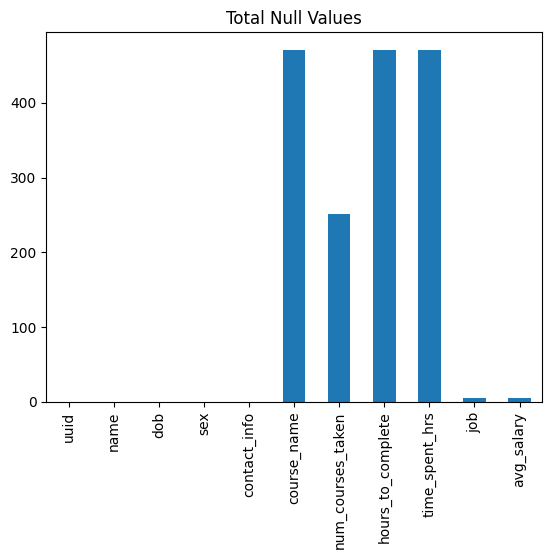

In [18]:
df.isna().sum().plot(title = "Total Null Values",kind = 'bar')

In [19]:
display(HTML("<h4 style='margin-left: 5%;'>Total Null Values</h4>"))
df.isnull().sum()

uuid                   0
name                   0
dob                    0
sex                    0
contact_info           0
course_name          471
num_courses_taken    251
hours_to_complete    471
time_spent_hrs       471
job                    5
avg_salary             5
dtype: int64

In [20]:
df[df['course_name'].isnull()].head()

,uuid,name,dob,sex,contact_info,course_name,num_courses_taken,hours_to_complete,time_spent_hrs,job,avg_salary
15,16,Norene Dalton,1976-04-30,F,"{""mailing_address"": ""130 Wishing Essex, Branch...",<NA>,0,NaN,<NA>,education,61000.0
19,20,Sofia van Steenbergen,1990-02-21,N,"{""mailing_address"": ""634 Clear Barn Dell, Beam...",<NA>,13,NaN,<NA>,HR,80000.0
30,31,Christoper Warner,1989-12-28,M,"{""mailing_address"": ""556 Stony Highlands, Drai...",<NA>,5,NaN,<NA>,engineer,101000.0
49,50,Antony Horne,1996-05-29,M,"{""mailing_address"": ""P.O. Box 78685, Lenox, Te...",<NA>,2,NaN,<NA>,software developer,110000.0
54,55,Omar Bunk,1955-11-08,M,"{""mailing_address"": ""445 Dale Hollow, Vermont ...",<NA>,14,NaN,<NA>,software developer,110000.0


#### What is the most common job?

In [21]:
df.job.value_counts()

job
engineer              706
analytics             693
HR                    680
software developer    675
creative              671
financial services    660
education             657
student               253
Name: count, dtype: int64

#### What is the average salary of an engineer?

In [22]:
df.query('job == "engineer"').head(1)

,uuid,name,dob,sex,contact_info,course_name,num_courses_taken,hours_to_complete,time_spent_hrs,job,avg_salary
6,7,Terrell Bleijenberg,1959-05-05,M,"{""mailing_address"": ""P.O. Box 53471, Oskaloosa...",android developer,9,27.0,24.17,engineer,101000.0


In [23]:
df.num_courses_taken.unique()

<IntegerArray>
[6, 5, 8, 7, 14, 10, 9, 3, 15, 13, 0, 4, 2, <NA>, 12, 11, 1]
Length: 17, dtype: Int64

Taking a look at which row/column pairs contain null values, it is reasonable to conclude this is a case of Missing Not At Random (MNAR). This is due to the observation where hours_to_complete and time_spent_hrs are null due to missing values in course_name. This likely occurs when a user drops their account without ever taking a course at all, resulting in no hours spent on any courses. In other words, when a value is null in course_name, it will also be null in hours_to_complete and time_spent_hrs. This will make the imputation step straight forward when filling these missing rows.

Now regarding the num_courses_taken missing values, this is interesting that there are missing values as well as values of 0. The most logical imputation for this feature is going to be filling null values with 0, since 0 and missing values represent the same thing for this feature. This is not always the case, but for this feature it will work.

Filling the 5 job/avg_salary values will be as simple as using the most common job title along with its respective average salary.

In [24]:
# Replace missing values in course_name with 'None'
df['course_name'].fillna('None', inplace=True)

# Fill missing values with 0 for num_courses_taken, hours_to_complete, and time_spent_hrs
df[['num_courses_taken', 
    'hours_to_complete', 
    'time_spent_hrs']] = df[['num_courses_taken', 
                             'hours_to_complete', 
                             'time_spent_hrs']].fillna(0)

# Fill missing values in job with 'engineer' and avg_salary with 101000
df['job'].fillna('engineer', inplace=True)
df['avg_salary'].fillna(101000, inplace=True)

# Verify the changes
df.isnull().sum()

uuid                 0
name                 0
dob                  0
sex                  0
contact_info         0
course_name          0
num_courses_taken    0
hours_to_complete    0
time_spent_hrs       0
job                  0
avg_salary           0
dtype: int64

#### Verify no duplicates are left

In [25]:
def duplicates(dataframe):
    before = dataframe.shape[0]
    dataframe = dataframe.drop_duplicates()
    after = dataframe.shape[0]

    total_duplicates = before - after
    print(f"There are a total of {total_duplicates} duplicates in this dataset.")
    
duplicates(df)

There are a total of 0 duplicates in this dataset.


#### Taking a look at the final cleaned dataset

In [26]:
df.describe()

,uuid,dob,num_courses_taken,hours_to_complete,time_spent_hrs,avg_salary
count,5000.000000,5000,5000.0,5000.000000,5000.0,5000.000000
mean,2500.500000,1973-03-15 17:21:59.040000,7.1554,19.712600,10.435382,87210.400000
min,1.000000,1942-01-10 00:00:00,0.0,0.000000,0.0,10000.000000
25%,1250.750000,1957-03-07 18:00:00,3.0,15.000000,3.68,66000.000000
50%,2500.500000,1972-12-07 12:00:00,7.0,20.000000,9.665,86000.000000
75%,3750.250000,1988-10-30 00:00:00,11.0,27.000000,15.84,110000.000000
max,5000.000000,2004-12-28 00:00:00,15.0,35.000000,35.98,135000.000000
std,1443.520003,NaN,4.784415,8.774657,7.946934,29297.784965


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uuid               5000 non-null   int64         
 1   name               5000 non-null   string        
 2   dob                5000 non-null   datetime64[ns]
 3   sex                5000 non-null   category      
 4   contact_info       5000 non-null   object        
 5   course_name        5000 non-null   string        
 6   num_courses_taken  5000 non-null   Int64         
 7   hours_to_complete  5000 non-null   float64       
 8   time_spent_hrs     5000 non-null   Float64       
 9   job                5000 non-null   object        
 10  avg_salary         5000 non-null   float64       
dtypes: Float64(1), Int64(1), category(1), datetime64[ns](1), float64(2), int64(1), object(2), string(2)
memory usage: 405.5+ KB


In [28]:
print(df.shape) # (rows, columns)
df.head()

(5000, 11)


,uuid,name,dob,sex,contact_info,course_name,num_courses_taken,hours_to_complete,time_spent_hrs,job,avg_salary
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",data scientist,6,20.0,4.99,HR,80000.0
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",android developer,5,27.0,4.4,HR,80000.0
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",android developer,8,27.0,6.74,HR,80000.0
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",machine learning engineer,7,35.0,12.31,education,61000.0
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",data analyst,14,12.0,5.64,HR,80000.0


#### Saving the dataframe to SQLite Database and a Flat CSV file for further analysis

In [30]:
# Export dataframe to CSV
df.to_csv('cademy_stats.csv', index=False)
print("CSV file 'cademy_stats.csv' has been created successfully.")

CSV file 'cademy_stats.csv' has been created successfully.


In [31]:
# Export dataframe to SQLite table
df.to_sql('cademy_stats', connection, if_exists='replace', index=False)
print("SQLite table 'cademy_stats' has been created successfully.")

SQLite table 'cademy_stats' has been created successfully.


In [32]:
# Close the connection
connection.close()
print("SQLite connection closed.")

SQLite connection closed.
